# IS362 - Week 12 Assignment: Preprocessing Data for Scikit-learn
BY: Daniela Porras

In this notebook, I will preprocess data from the Mushroom dataset provided by the UCI Machine Learning Repository. This assignment involves selecting specific features, renaming the columns meaningfully, converting categorical values into numeric values, and conducting exploratory data analysis. The goal is to prepare the dataset for use in a future predictive analysis where we will determine which attributes are most helpful in predicting whether a mushroom is edible or poisonous. 

## Step 1: Import Libraries and Load the Dataset
In this step, I import the necessary Python libraries and load the mushroom dataset into a pandas DataFrame. Since the original file does not include headers, I manually assign meaningful column names based on the dataset’s data dictionary.

In [1]:
import pandas as pd

# Column names based on data dictionary
column_names = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population', 'habitat'
]

# Load the dataset
df = pd.read_csv("agaricus-lepiota.data", header=None, names=column_names)

# Show the first 5 rows
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Step 2: Select Relevant Columns and Rename for Clarity  
In this step, I create a new DataFrame using only a subset of the columns from the original mushroom dataset.  
For this assignment, I am including three columns:

- The `class` column, which is the **target variable** indicating whether the mushroom is edible (`e`) or poisonous (`p`).  
- The `odor` column, which is a strong indicator of edibility, as certain odors are closely associated with poisonous mushrooms.  
- One additional feature of my choice: `gill-color`, which describes the color of the mushroom’s gills. While this is just a visual trait, it may help distinguish poisonous mushrooms from edible ones when combined with other features.

I will also rename these columns with more descriptive names to make them easier to interpret during analysis and model building.

In [2]:
# Select relevant columns
df_subset = df[['class', 'odor', 'gill-color']].copy()

# Rename columns
df_subset.columns = ['is_poisonous', 'odor', 'gill_color']

# Preview the new DataFrame
df_subset.head()

,is_poisonous,odor,gill_color
0,p,p,k
1,e,a,k
2,e,l,n
3,p,p,n
4,e,n,k


## Step 3: Convert Categorical Values to Numeric  
To use this dataset with machine learning tools like scikit-learn later in Project 4, all the values need to be stored as numbers instead of letters.  
In this step, I will convert the values in all three columns into numeric format using simple mappings. For example, the `is_poisonous` column will be mapped so that `e` (edible) becomes 0 and `p` (poisonous) becomes 1. 
This transformation allows machine learning models to better understand the patterns in the data.


In [3]:
# Convert 'is_poisonous' to numeric: e (edible) = 0, p (poisonous) = 1
df_subset['is_poisonous'] = df_subset['is_poisonous'].map({'e': 0, 'p': 1})

# Map 'odor' to numeric values
odor_mapping = {value: idx for idx, value in enumerate(df_subset['odor'].unique())}
df_subset['odor'] = df_subset['odor'].map(odor_mapping)

# Map 'gill_color' to numeric values
gill_mapping = {value: idx for idx, value in enumerate(df_subset['gill_color'].unique())}
df_subset['gill_color'] = df_subset['gill_color'].map(gill_mapping)

# Preview the updated DataFrame
df_subset.head()

,is_poisonous,odor,gill_color
0,1,0,0
1,0,1,0
2,0,2,1
3,1,0,1
4,0,3,0


## Step 4: Exploratory Data Analysis  
In this step, I will explore the dataset visually to better understand the distribution of values across the selected columns.  
I will begin by plotting the distribution of each column individually, and then create scatterplots to explore possible relationships between the predictors (`odor` and `gill_color`) and the target variable (`is_poisonous`).  
This will help identify patterns that might suggest whether odor or gill color could be useful for predicting if a mushroom is poisonous.

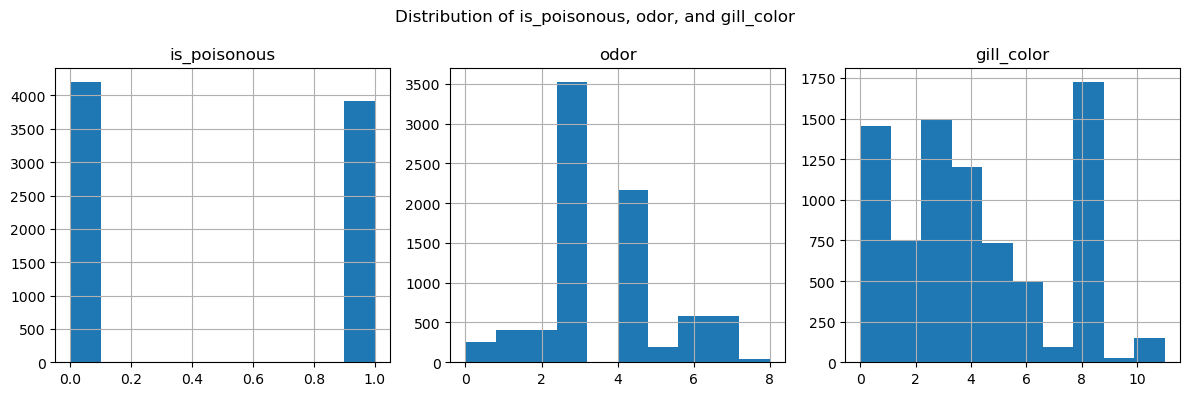

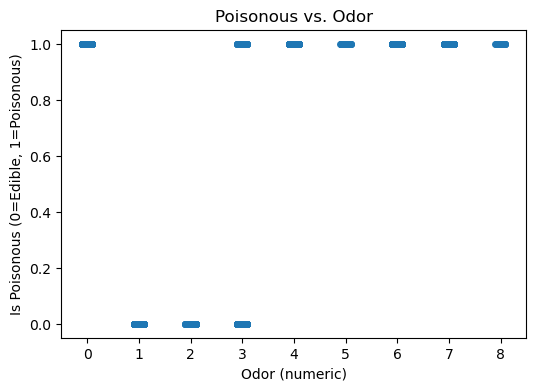

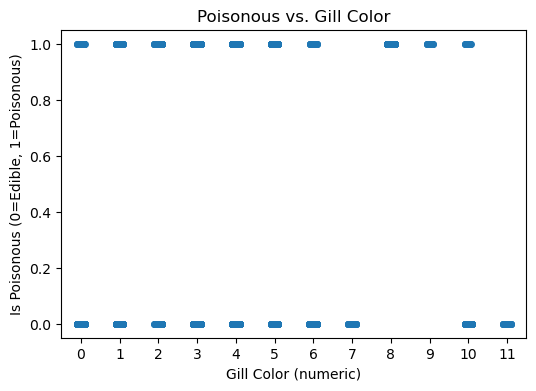

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of each column
df_subset.hist(bins=10, figsize=(12, 4), layout=(1, 3))
plt.suptitle("Distribution of is_poisonous, odor, and gill_color")
plt.tight_layout()
plt.show()

# Scatterplot: is_poisonous vs odor
plt.figure(figsize=(6, 4))
sns.stripplot(data=df_subset, x="odor", y="is_poisonous", jitter=True)
plt.title("Poisonous vs. Odor")
plt.xlabel("Odor (numeric)")
plt.ylabel("Is Poisonous (0=Edible, 1=Poisonous)")
plt.show()

# Scatterplot: is_poisonous vs gill_color
plt.figure(figsize=(6, 4))
sns.stripplot(data=df_subset, x="gill_color", y="is_poisonous", jitter=True)
plt.title("Poisonous vs. Gill Color")
plt.xlabel("Gill Color (numeric)")
plt.ylabel("Is Poisonous (0=Edible, 1=Poisonous)")
plt.show()

The first three visualizations shows the distribution of values in each column:

- **`is_poisonous` Distribution**: This histogram shows how many mushrooms in the dataset are edible (0) versus poisonous (1). The dataset appears fairly balanced, with a slight tilt toward edible mushrooms.
- **`odor` Distribution**: This plot shows the frequency of different odor types (represented by numbers after encoding). Some odors are much more common than others, and this may help in identifying poisonous mushrooms.
- **`gill_color` Distribution**: This chart displays the spread of different gill colors. There’s quite a bit of variation, which might suggest this feature has some predictive potential when used with others.

The next two visualizations explores relationships between the features and the target variable:

- **Poisonous vs. Odor**: This scatterplot suggests a strong pattern. Certain odor values are clearly associated only with poisonous mushrooms (value = 1), while others appear only with edible mushrooms (value = 0). This indicates that `odor` could be a very strong predictor.
- **Poisonous vs. Gill Color**: This plot shows more overlap between edible and poisonous mushrooms, meaning `gill_color` may still offer some predictive power but likely not as strong as `odor` when used alone.

These charts help to start forming hypotheses about which features might be useful for predicting whether a mushroom is safe to eat.

## Step 6: Preliminary Conclusions  

Based on the exploratory data analysis, I can already see that the `odor` column appears to be a very strong predictor of whether a mushroom is poisonous. In the scatterplot, some odor values are only associated with poisonous mushrooms, while others are linked only to edible ones. This suggests that `odor` could be used almost as a standalone feature to predict toxicity with high accuracy.

On the other hand, the `gill_color` column does not show as strong of a separation. There is more overlap between poisonous and edible mushrooms across different gill colors, which means this feature may still be useful when combined with others, but it might not be a strong predictor on its own.

Overall, this analysis helps confirm that certain physical characteristics of mushrooms, like smell and gill color, do carry important patterns that could help a predictive model distinguish between edible and poisonous types. This prepares the data for future modeling using scikit-learn in Project 4.
